# Import Packages

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils

# Loading the data

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# Understanding the data

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
y_train[0]

5

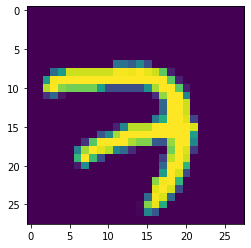

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5000])

# Reshaping dataset

In [9]:
x_train=x_train.reshape(60000,28,28,1).astype('float32')
x_test=x_test.reshape(10000,28,28,1).astype('float32')

# Applying Hot Encoding

In [10]:
number_of_classes=10
y_train=np_utils.to_categorical(y_train,number_of_classes)
y_test=np_utils.to_categorical(y_test,number_of_classes)

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Add CNN Layer

In [12]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(number_of_classes,activation='softmax'))

# Compile The model

In [13]:
model.compile(loss='categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])

# Train the model

In [14]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 138s 70ms/step - loss: 0.2030 - accuracy: 0.9519 - val_loss: 0.1033 - val_accuracy: 0.9684
Epoch 2/5
1875/1875 [==============================] - 123s 66ms/step - loss: 0.0685 - accuracy: 0.9790 - val_loss: 0.0885 - val_accuracy: 0.9752
Epoch 3/5
1875/1875 [==============================] - 128s 68ms/step - loss: 0.0465 - accuracy: 0.9849 - val_loss: 0.0851 - val_accuracy: 0.9783
Epoch 4/5
1875/1875 [==============================] - 126s 67ms/step - loss: 0.0344 - accuracy: 0.9887 - val_loss: 0.1071 - val_accuracy: 0.9755
Epoch 5/5
1875/1875 [==============================] - 124s 66ms/step - loss: 0.0302 - accuracy: 0.9907 - val_loss: 0.1099 - val_accuracy: 0.9771


# Observing the metrics

In [15]:
metrics = model.evaluate(x_test,y_test,verbose=0)
print("Metrics(Test loss & test accuracy):")
print(metrics)

Metrics(Test loss & test accuracy):
[0.10988721996545792, 0.9771000146865845]


# Test the model

In [16]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 269ms/step
[[2.1105291e-15 1.3298137e-17 6.4488394e-13 7.1933584e-07 4.4467670e-05
  1.0599498e-08 3.9587652e-16 2.5234598e-05 1.0119983e-07 9.9992943e-01]]


In [17]:
import numpy as np
print(np.argmax(prediction, axis=1)) 
np.argmax(y_test[5000:5001])

[9]


3

# Save the model

In [18]:
model.save('models/mnistCNN.h5')
print(model)